# Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

### Module Imports

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load Indian restaurants data

In [2]:
# fetch data
df = pd.read_csv('zomato.csv')

# extract indian restaurant's data
df = df[df['Country Code'] == 1]

# df

### drop rows containing nan values of Aggregate rating, Votes and City columns

In [3]:
# drop nan values of Aggregate rating, Votes and City columns
df.dropna(subset=['Aggregate rating', 'Votes', 'City'], inplace=True)

# df

### Make a column 'vote_rating_product' that contains product of 'vote and rating'

In [4]:
# Make a column 'vote_rating_product' that contains product of 'vote and rating'
df['vote_rating_product'] = df['Aggregate rating'] * df['Votes']

# df

### city wise restaurant's count

In [5]:
# city wise restaurant's count
restaurant_count= df.groupby('City')['Restaurant ID'].count()

# restaurant_count

### city wise sum of (vote*rating)

In [6]:
# city wise sum of (vote*rating)
vrp_sum= df.groupby('City')['vote_rating_product'].sum()
# vrp_sum

### city wise votes sum

In [7]:
# city wise votes sum
votes_sum = df.groupby('City')['Votes'].sum()
# votes_sum

### city_wise_weighted_restaurant_rating

In [8]:
# city_wise_weighted_restaurant_rating
weighted_restaurant_rating = vrp_sum/votes_sum

# weighted_restaurant_rating

### Separate city names, number of restaurants in city and city wise restaurant's weighted rating

In [9]:
# city names
cities = restaurant_count.index

# number of restaurants in city
cities_num_restaurant = restaurant_count.values

# city wise restaurant's weighted rating
cities_weighted_restaurant_rating = weighted_restaurant_rating.values

## plot bubble chart

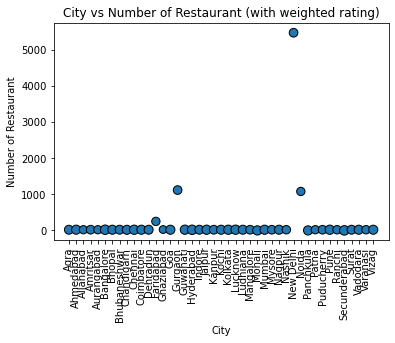

In [10]:
# plot bubble chart
plt.scatter(cities, cities_num_restaurant,s = cities_weighted_restaurant_rating*20, edgecolor='black')

plt.xticks(rotation=90)

plt.title('City vs Number of Restaurant (with weighted rating)')
plt.xlabel('City')
plt.ylabel('Number of Restaurant')

plt.show()

## Clearly, this bubble chart is quite messy, so I have distributed the data in 3 categories and plot respective bubble chart

## Please see below

# |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

## Create new dataframe stroing cities, their restaurant count and weighted rating

In [11]:
# new dataframe stroing cities, their restaurant count and weighted rating
data = {
    'City': cities,
    'Restaurant_Count': cities_num_restaurant,
    'Weighted_Rating': cities_weighted_restaurant_rating
}

new_df = pd.DataFrame(data)
# new_df

# As above bubble chart is messy, I am plotting bubble chart for 3 different variations

## 1.) restaurant count > 25

In [12]:
new_df_above_25 = new_df[new_df.Restaurant_Count > 25]
# new_df_above_25

In [13]:
# city names
cities = new_df_above_25.City.values

# num restaurants in city
cities_num_restaurant = new_df_above_25.Restaurant_Count.values

# weighted rating
cities_weighted_restaurant_rating = new_df_above_25.Weighted_Rating.values

# subtracting 3 and multiply by 500 to see clear difference in bubble size
cities_weighted_restaurant_rating = (cities_weighted_restaurant_rating -3) * 500

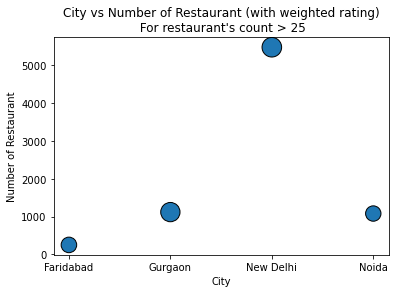

In [14]:
# plot bubble chart
plt.scatter(cities, cities_num_restaurant,s = cities_weighted_restaurant_rating, edgecolor='black')

plt.title("City vs Number of Restaurant (with weighted rating)\n For restaurant's count > 25")
plt.xlabel('City')
plt.ylabel('Number of Restaurant')

plt.show()

## 2.) restaurant count < 15

In [15]:
new_df_less_15 = new_df[new_df.Restaurant_Count < 15]
# new_df_less_15

In [16]:
# city names
cities = new_df_less_15.City.values

# num restaurants in city
cities_num_restaurant = new_df_less_15.Restaurant_Count.values

# weighted rating
cities_weighted_restaurant_rating = new_df_less_15.Weighted_Rating.values

# subtracting 3 and multiply by 500 to see clear difference in bubble size
cities_weighted_restaurant_rating = (cities_weighted_restaurant_rating -3) * 500

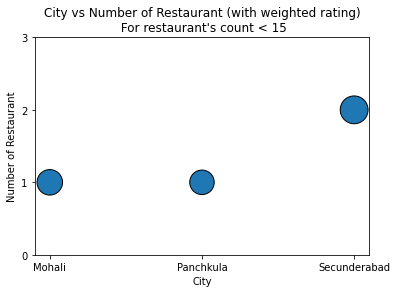

In [17]:
# plot bubble chart
plt.scatter(cities, cities_num_restaurant,s = cities_weighted_restaurant_rating, edgecolor='black')

plt.yticks([0, 1, 2, 3])

plt.title("City vs Number of Restaurant (with weighted rating)\n For restaurant's count < 15")
plt.xlabel('City')
plt.ylabel('Number of Restaurant')

plt.show()

## 3.) rest other

In [18]:
new_df_rest = new_df[(new_df.Restaurant_Count >= 15) & (new_df.Restaurant_Count <= 25)]
# new_df_rest

In [19]:
# city names
cities = new_df_rest.City.values

# num restaurants in city
cities_num_restaurant = new_df_rest.Restaurant_Count.values

# weighted rating
cities_weighted_restaurant_rating = new_df_rest.Weighted_Rating.values

# subtracting 3 and multiply by 50 to see clear difference in bubble size
cities_weighted_restaurant_rating = (cities_weighted_restaurant_rating -3) * 50

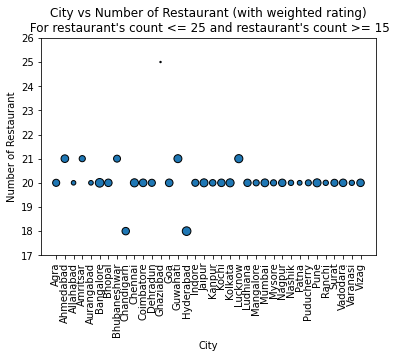

In [20]:
# plot bubble chart
plt.scatter(cities, cities_num_restaurant,s = cities_weighted_restaurant_rating, edgecolor='black')

plt.xticks(rotation = 90)
plt.yticks([17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

plt.title("City vs Number of Restaurant (with weighted rating)\n For restaurant's count <= 25 and restaurant's count >= 15")
plt.xlabel('City')
plt.ylabel('Number of Restaurant')

plt.show()

# |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||